In [4]:
# first version - difficult to uncompute ancillas

sys.path.append("..") # see os.getcwd()
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt


from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram
from quantum_mc.arithmetic import multiply_add 

qr_input = QuantumRegister(3, 'input')
qr_result = QuantumRegister(6, 'result')
qr_cond = QuantumRegister(3, 'conditions')
qr_ancilla = QuantumRegister(6, 'ancilla')
output = ClassicalRegister(6, 'output')
circ = QuantumCircuit(qr_input, qr_result, qr_cond, qr_ancilla, output) 

sigma = 1
low = -3
high = 3
mu = 0

normal = NormalDistribution(3, mu=mu, sigma=sigma**2, bounds=(low, high))
circ.append(normal, qr_input)

comp0 = IntegerComparator(num_state_qubits=3, value=3, name = "comparator0") # if true if i >= point
comp1 = IntegerComparator(num_state_qubits=3, value=6, name = "comparator1") # if true if i >= point
trans0 = multiply_add.cond_classical_add_mult(6, 7, qr_input, qr_result, qr_ancilla) 
trans1 = multiply_add.cond_classical_add_mult(1, 17, qr_input, qr_result, qr_ancilla) 
trans2 = multiply_add.cond_classical_add_mult(3, 7, qr_input, qr_result, qr_ancilla)  

circ.append(comp1, qr_input[:] + [qr_cond[2]] + qr_ancilla[0:comp0.num_ancillas])
circ.append(trans2, [qr_cond[2]] + qr_input[:] + qr_result[:] + qr_ancilla[:])

circ.x(qr_cond[2])

circ.append(comp0, qr_input[:] + [qr_cond[0]] + qr_ancilla[0:comp0.num_ancillas])
circ.ccx(qr_cond[0], qr_cond[2], qr_cond[1])
circ.append(trans1, [qr_cond[1]] + qr_input[:] + qr_result[:] + qr_ancilla[:])

circ.x(qr_cond[0])
circ.append(trans0, [qr_cond[0]] + qr_input[:] + qr_result[:] + qr_ancilla[:])

circ.measure(qr_result, output)

#circ.draw()

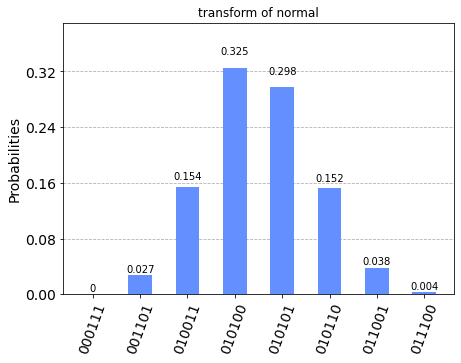

In [5]:
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "transform of normal")

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..") # see os.getcwd()
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram
from quantum_mc.arithmetic import multiply_add 

qr_input = QuantumRegister(3, 'input')
qr_result = QuantumRegister(6, 'result')
qr_comp = QuantumRegister(2, 'comparisons')
qr_ancilla = QuantumRegister(6, 'ancilla')
qr_comp_anc = QuantumRegister(3, 'cond_ancilla')
output = ClassicalRegister(6, 'output')
circ = QuantumCircuit(qr_input, qr_result, qr_comp, qr_ancilla, qr_comp_anc, output) 

# our test piece-wise transforms:
# trans0 if x <= 2, x => 6*x + 7
# trans1 if 2 < x <= 5, x => x + 17 
# trans2 if x > 5, x => 3*x + 7

sigma = 1
low = -3
high = 3
mu = 0

normal = NormalDistribution(3, mu=mu, sigma=sigma**2, bounds=(low, high))
circ.append(normal, qr_input)

comp0 = IntegerComparator(num_state_qubits=3, value=3, name = "comparator0") # if true if i >= point
comp1 = IntegerComparator(num_state_qubits=3, value=6, name = "comparator1") # if true if i >= point
trans0 = multiply_add.cond_classical_add_mult(6, 7, qr_input, qr_result, qr_ancilla) 
trans1 = multiply_add.cond_classical_add_mult(1, 17, qr_input, qr_result, qr_ancilla) 
trans2 = multiply_add.cond_classical_add_mult(3, 7, qr_input, qr_result, qr_ancilla)  

circ.append(comp0, qr_input[:] + [qr_comp[0]] + qr_ancilla[0:comp0.num_ancillas])
circ.append(comp1, qr_input[:] + [qr_comp[1]] + qr_ancilla[0:comp0.num_ancillas])

circ.cx(qr_comp[0], qr_comp_anc[0])
circ.x(qr_comp_anc[0])
circ.cx(qr_comp[1], qr_comp_anc[2])
circ.x(qr_comp_anc[2])
circ.ccx(qr_comp[0], qr_comp_anc[2], qr_comp_anc[1])

circ.append(trans0, [qr_comp_anc[0]] + qr_input[:] + qr_result[:] + qr_ancilla[:])
circ.append(trans1, [qr_comp_anc[1]] + qr_input[:] + qr_result[:] + qr_ancilla[:])
circ.append(trans2, [qr_comp[1]] + qr_input[:] + qr_result[:] + qr_ancilla[:])

# can uncompute qr_comp_anc
# then uncompute the comparators 

circ.measure(qr_result, output)

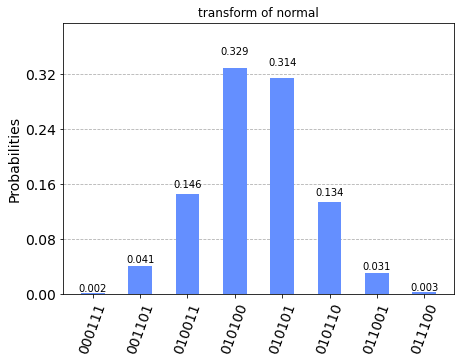

In [7]:
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "transform of normal")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..") # see os.getcwd()
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram
from quantum_mc.arithmetic import multiply_add
from quantum_mc.arithmetic.piecewise_linear_transform import PiecewiseLinearTransform3

sigma = 1
low = -3
high = 3
mu = 0

normal = NormalDistribution(3, mu=mu, sigma=sigma**2, bounds=(low, high))
transform = Piecewise

qr_input = QuantumRegister(3, 'input')
qr_result = QuantumRegister(6, 'result')
qr_ancilla = QuantumRegister(6, 'ancilla')

circ = QuantumCircuit(qr_input, qr_result, qr_comp, qr_ancilla, qr_comp_anc, output) 
PiecewiseLinearTransform3

# our test piece-wise transforms:
# trans0 if x <= 2, x => 6*x + 7
# trans1 if 2 < x <= 5, x => x + 17 
# trans2 if x > 5, x => 3*x + 7



In [1]:
sys.path.append("..") # see os.getcwd()
import numpy as np
import matplotlib.pyplot as plt

from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram
from quantum_mc.arithmetic.piecewise_linear_transform import PiecewiseLinearTransform3

sigma = 1
low = -3
high = 3
mu = 0

normal = NormalDistribution(3, mu=mu, sigma=sigma**2, bounds=(low, high))

# our test piece-wise transforms:
# trans0 if x <= 2, x => 6*x + 7
# trans1 if 2 < x <= 5, x => x + 17 
# trans2 if x > 5, x => 3*x + 7
trans = PiecewiseLinearTransform3(2, 5, 6, 1, 3, 7, 17, 7)
num_ancillas = trans.num_ancilla_qubits

qr_input = QuantumRegister(3, 'input')
qr_result = QuantumRegister(6, 'result')
qr_ancilla = QuantumRegister(num_ancillas, 'ancilla')
#output = ClassicalRegister(6, 'output')
output = ClassicalRegister(11, 'output')

circ = QuantumCircuit(qr_input, qr_result, qr_ancilla, output) 
circ.append(normal, qr_input)
circ.append(trans, qr_input[:] + qr_result[:] + qr_ancilla[:])

#circ.measure(qr_result, output)
circ.measure(qr_ancilla, output)


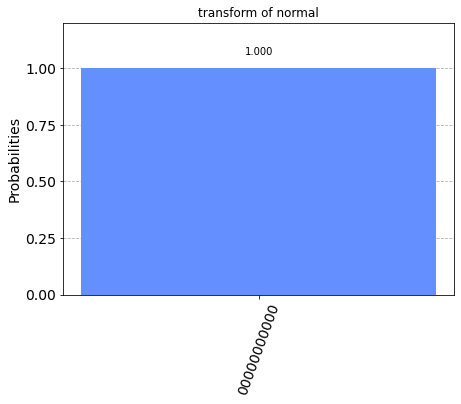

In [2]:
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "transform of normal")

In [4]:
num_ancillas

11

In [3]:
circ.draw()

┌───────┐┌────────────────────┐                                 
   input_0: ┤0      ├┤0                   ├─────────────────────────────────
            │       ││                    │                                 
   input_1: ┤1 P(X) ├┤1                   ├─────────────────────────────────
            │       ││                    │                                 
   input_2: ┤2      ├┤2                   ├─────────────────────────────────
            └───────┘│                    │                                 
  result_0: ─────────┤3                   ├─────────────────────────────────
                     │                    │                                 
  result_1: ─────────┤4                   ├─────────────────────────────────
                     │                    │                                 
  result_2: ─────────┤5                   ├─────────────────────────────────
                     │                    │                                 
  result_3: ─────────┤6                   ├─────────────────────────────────
                     │                    │                                 
  result_4: ─────────┤7                   ├─────────────────────────────────
                     │                    │                                 
  result_5: ─────────┤8                   ├─────────────────────────────────
                     │                    │┌─┐                              
 ancilla_0: ─────────┤9                   ├┤M├──────────────────────────────
                     │   pwise_lin_trans3 │└╥┘┌─┐                           
 ancilla_1: ─────────┤10                  ├─╫─┤M├───────────────────────────
                     │                    │ ║ └╥┘┌─┐                        
 ancilla_2: ─────────┤11                  ├─╫──╫─┤M├────────────────────────
                     │                    │ ║  ║ └╥┘┌─┐                     
 ancilla_3: ─────────┤12                  ├─╫──╫──╫─┤M├─────────────────────
                     │                    │ ║  ║  ║ └╥┘┌─┐                  
 ancilla_4: ─────────┤13                  ├─╫──╫──╫──╫─┤M├──────────────────
                     │                    │ ║  ║  ║  ║ └╥┘┌─┐               
 ancilla_5: ─────────┤14                  ├─╫──╫──╫──╫──╫─┤M├───────────────
                     │                    │ ║  ║  ║  ║  ║ └╥┘┌─┐            
 ancilla_6: ─────────┤15                  ├─╫──╫──╫──╫──╫──╫─┤M├────────────
                     │                    │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
 ancilla_7: ─────────┤16                  ├─╫──╫──╫──╫──╫──╫──╫─┤M├─────────
                     │                    │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 ancilla_8: ─────────┤17                  ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
                     │                    │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 ancilla_9: ─────────┤18                  ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
                     │                    │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
ancilla_10: ─────────┤19                  ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
                     └────────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
 output: 11/════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                            0  1  2  3  4  5  6  7  8  9  10

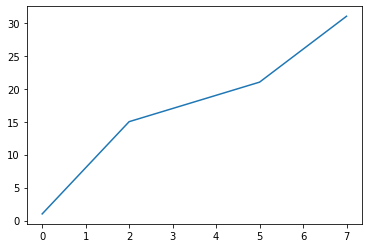

In [4]:
sys.path.append("..") # see os.getcwd()

import unittest
import numpy as np
from qiskit.test.base import QiskitTestCase
import quantum_mc.calibration.fitting as ft
import quantum_mc.calibration.time_series as ts
import sys, os
import matplotlib.pyplot as plt

# AAPL, MSFT, SPX
correl = ft.get_correl("AAPL", "MSFT")
ticker = "MSFT"
#data = ts.get_data(ticker)
((cdf_x, cdf_y), sigma) = ft.get_cdf_data(ticker)
(x, y) = ft.get_fit_data(ticker, norm_to_rel = False)
(pl, coeffs) = ft.fit_piecewise_linear(x, y)
(i_0, i_1, a0, a1, a2, b0, b1, b2, i_to_j, i_to_x, j_to_y) = ft.convert_to_integer(pl, coeffs)

i = np.arange(0, 2**3)
plt.plot(i, np.vectorize(i_to_j)(i))

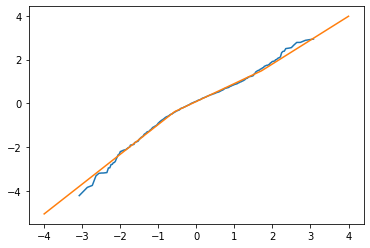

In [10]:
plt.plot(x, y)
plt.plot(np.vectorize(i_to_x)(i), np.vectorize(j_to_y)(np.vectorize(i_to_j)(i)))

In [19]:
sys.path.append("..") # see os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
import quantum_mc.calibration.fitting as ft
import quantum_mc.calibration.time_series as ts
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram
from quantum_mc.arithmetic.piecewise_linear_transform import PiecewiseLinearTransform3
import quantum_mc.arithmetic.multiply_add as multiply_add

correl = ft.get_correl("AAPL", "MSFT")
correl[0, 1] = correl[1, 0] = -0.99999
num_qubits = [3, 3]        
sigma = correl #**2
bounds = [(-3, 3), (-3, 3)] 
mu = [0, 0]

normal = NormalDistribution(num_qubits, mu=mu, sigma=sigma, bounds=bounds)

transforms = []
for ticker in ["MSFT", "AAPL"]:
    ((cdf_x, cdf_y), sigma) = ft.get_cdf_data(ticker)
    (x, y) = ft.get_fit_data(ticker, norm_to_rel = False)
    (pl, coeffs) = ft.fit_piecewise_linear(x, y)
    (i_0, i_1, a0, a1, a2, b0, b1, b2, i_to_j, i_to_x, j_to_y) = ft.convert_to_integer(pl, coeffs)
    #a0 = 1; a1 = 1; a2 = 1; b0 = 0; b1 = 0; b2 = 0
    transforms.append(PiecewiseLinearTransform3(i_0, i_1, a0, a1, a2, b0, b1, b2))

num_ancillas = transforms[0].num_ancilla_qubits

qr_input = QuantumRegister(6, 'input') # 2 times 3 registers
qr_result = QuantumRegister(6, 'result')
qr_ancilla = QuantumRegister(num_ancillas, 'ancilla')
output = ClassicalRegister(6, 'output')

circ = QuantumCircuit(qr_input, qr_result, qr_ancilla, output) 
circ.append(normal, qr_input)

for i in range(2): 
    offset = i * 3
    circ.append(transforms[i], qr_input[offset:offset + 3] + qr_result[:] + qr_ancilla[:])

#multiply_add.classical_mult(circ, 2, qr_input[0:3], qr_result, qr_ancilla)
#multiply_add.classical_mult(circ, 2, qr_input[3:6], qr_result, qr_ancilla)

circ.measure(qr_result, output)
circ.draw()

┌───────┐┌───────────────────┐                                    »
   input_0: ┤0      ├┤0                  ├────────────────────────────────────»
            │       ││                   │                                    »
   input_1: ┤1      ├┤1                  ├────────────────────────────────────»
            │       ││                   │                                    »
   input_2: ┤2      ├┤2                  ├────────────────────────────────────»
            │  P(X) ││                   │┌───────────────────┐               »
   input_3: ┤3      ├┤                   ├┤0                  ├───────────────»
            │       ││                   ││                   │               »
   input_4: ┤4      ├┤                   ├┤1                  ├───────────────»
            │       ││                   ││                   │               »
   input_5: ┤5      ├┤                   ├┤2                  ├───────────────»
            └───────┘│                   ││                   │┌─┐            »
  result_0: ─────────┤3                  ├┤3                  ├┤M├────────────»
                     │                   ││                   │└╥┘┌─┐         »
  result_1: ─────────┤4                  ├┤4                  ├─╫─┤M├─────────»
                     │                   ││                   │ ║ └╥┘┌─┐      »
  result_2: ─────────┤5                  ├┤5                  ├─╫──╫─┤M├──────»
                     │                   ││                   │ ║  ║ └╥┘┌─┐   »
  result_3: ─────────┤6                  ├┤6                  ├─╫──╫──╫─┤M├───»
                     │                   ││                   │ ║  ║  ║ └╥┘┌─┐»
  result_4: ─────────┤7                  ├┤7                  ├─╫──╫──╫──╫─┤M├»
                     │                   ││                   │ ║  ║  ║  ║ └╥┘»
  result_5: ─────────┤8  pwise_lin_trans ├┤8                  ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_0: ─────────┤9                  ├┤9                  ├─╫──╫──╫──╫──╫─»
                     │                   ││   pwise_lin_trans │ ║  ║  ║  ║  ║ »
 ancilla_1: ─────────┤10                 ├┤10                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_2: ─────────┤11                 ├┤11                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_3: ─────────┤12                 ├┤12                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_4: ─────────┤13                 ├┤13                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_5: ─────────┤14                 ├┤14                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_6: ─────────┤15                 ├┤15                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_7: ─────────┤16                 ├┤16                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_8: ─────────┤17                 ├┤17                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
 ancilla_9: ─────────┤18                 ├┤18                 ├─╫──╫──╫──╫──╫─»
                     │                   ││                   │ ║  ║  ║  ║  ║ »
ancilla_10: ─────────┤19                 ├┤19                 ├─╫──╫──╫──╫──╫─»
                     └───────────────────┘└───────────────────┘ ║  ║  ║  ║  ║ »
  output: 6/════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
                                                                0  1  2  3  4 »
«               
«   input_0: ───
«               
«   input_1: ───
«               
«   inp

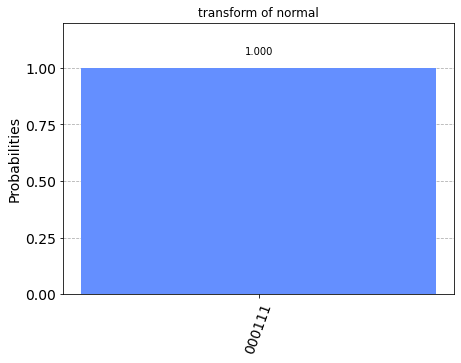

In [20]:
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "transform of normal")

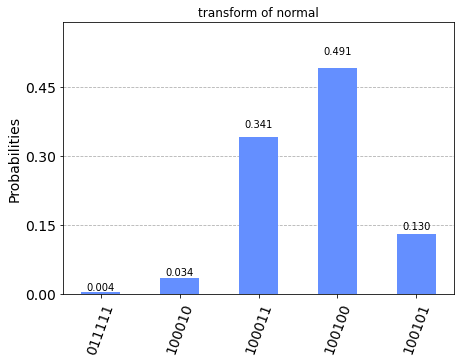

In [8]:
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "transform of normal")

In [2]:
correl


array([[ 1., -1.],
       [-1.,  1.]])

In [27]:
j_to_y(18)

0.24057801967041392